<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suppor Vector Machine

- A supervised learning algorithm 
- Maximize the margin between two different classes with the decision boundary in-between.
- Decision boundary can be defined as $w^T X + b = 0$. 
- $w$ is parallel to the normal vector of the decision boundary which is the hyper plane that splits the two different classes. 
- Thus, maximizing the margin means minimizing the norm of $w$ which defines the decision boundary with $b$, while satisfying the following constraint.
$$ min_{w, b} \frac{1}{2}||w||^2 $$ 
$$ s.t. y^{(i)} (w^T x^{(i)} + b) \geq 1$$
$$ i=1,...,m$$

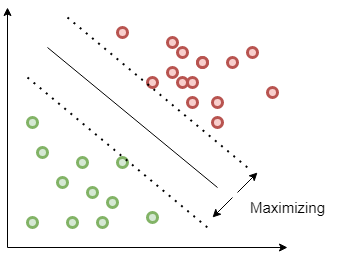

## Hinge Loss 

- When there are mixed labels or some labels are misclassified, only a few of these can make it diffilcult to solve the optimization problem with the hard constraint. 
- With soft constraint, it would become easier to solve by allowing some misclassfied data points. 
- Therefore, the problem can be redefined with the new cost function to be minimized, which is called Hinge Loss. 
$$ min_{w, b} \frac{1}{2}||w||^2 + c \sum_{i=1}^{m} max(0, 1-y^{(i)} (w^T x^{(i)} +b))$$
- The coefficient $c$ is a hyperparamter that controls the relative effect of the soft constraint in the cost function. If $c$ is large, the cost function will be minimized to minimize the constraint term more than the regularizer term. 


## 1) Import libraries and complete notebook setting

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split

from ml_algorithms.support_vector_machine import * 

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

## 2) Load and preprocess dataset 

In [3]:
def normalize(x):
  x = (x-np.mean(x, axis=0))/np.std(x, axis=0)
  return x 

In [4]:
X, y = datasets.make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    cluster_std=1,
    random_state=42
)

# preprocess labels 
y = np.where(y==0, -1, 1)

In [5]:
X = normalize(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X = train_X.T
test_X = test_X.T 
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)

print(f'train_X: {train_X.shape}')
print(f'train_y: {train_y.shape}')
print(f'test_X: {test_X.shape}')
print(f'test_y: {test_y.shape}')


train_X: (2, 80)
train_y: (1, 80)
test_X: (2, 20)
test_y: (1, 20)


## 3) Implement Support Vector Machine algorithm 

In [19]:
import inspect
lines = inspect.getsource(SupportVectorMachine)
print(lines)

class SupportVectorMachine():
    def __init__(self, c: float = 1.0) -> None:
        self.train_X: np.ndarray
        self.train_Y: np.ndarray
        self.W: np.ndarray
        self.b: np.ndarray
        self.c = c

    def fit(self, X:np.ndarray, Y:np.ndarray, learning_rate: float, iterations: int):

        self.train_X = X
        self.train_Y = Y

        self.W = np.zeros((self.train_Y.shape[0], self.train_X.shape[0]))
        self.b = np.zeros((self.train_Y.shape[0], 1))

        losses = []
        for iter in range(1, iterations+1):

            T = self.train_Y * (self.W @ self.train_X + self.b)
            hinge_loss = self.hinge_loss(self.train_X, self.train_Y, T)
            losses.append(hinge_loss)
            gradients = self.gradients(T)
            self.update_parameters(gradients, learning_rate)
            if iter %5 == 0:
                print(f"Loss @ iter{iter}= {hinge_loss}")
        return losses

    def predict(self, X):
        Z = self.W @ X + self.b
     

## 4) Test the algorithm 

In [9]:
iterations = 50 
learning_rate = 0.1 
svm = SupportVectorMachine(c=1.0)
losses = svm.fit(train_X, train_y, learning_rate=learning_rate, iterations=iterations)
preds = svm.predict(test_X)
acc = np.sum(preds == test_y) / preds.shape[1]
print(f'accuracy on testset= {acc}')

Loss @ iter5= 3.952741330983769
Loss @ iter10= 2.334054228532606
Loss @ iter15= 1.3782356814062182
Loss @ iter20= 0.8138343875135577
Loss @ iter25= 0.7529975929790467
Loss @ iter30= 0.8163633518948372
Loss @ iter35= 0.8855415464150473
Loss @ iter40= 0.6465738059261211
Loss @ iter45= 0.7425654252737831
Loss @ iter50= 0.6708263265998045
accuracy on testset= 1.0


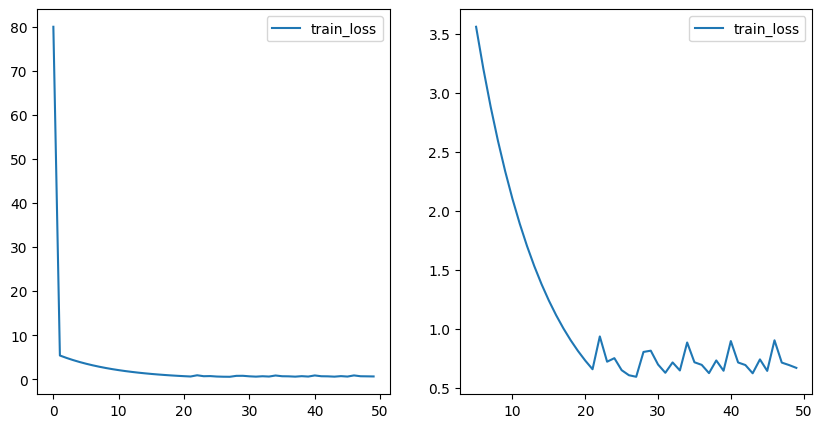

In [17]:
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)
plt.plot(range(iterations), losses, label='train_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(iterations)[5:], losses[5:], label='train_loss')
plt.legend()

## 5) Visualize the result 

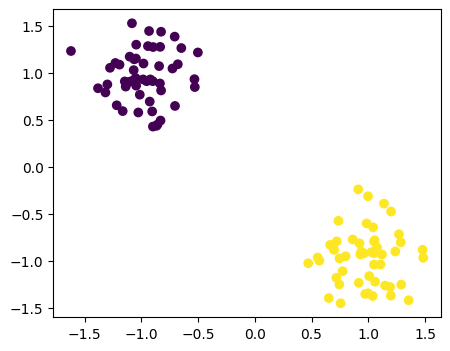

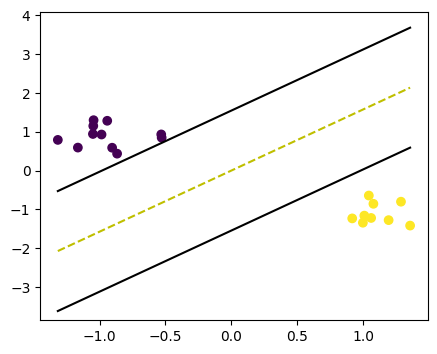

In [7]:
w = svm.W
b = svm.b

# Visualizing the scatter plot of the dataset
def visualize_dataset(X, y):
    plt.scatter(X[0, :], X[1, :], c=y)


# Visualizing SVM
def visualize_svm(X, y):

    def get_hyperplane_value(x, w, b, offset):
        z = -(w[:, 0] * x + b + offset) / w[:, 1]
        return np.squeeze(z)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[0, :], X[1, :], marker="o", c=y)

    x0_1 = np.amin(X[0, :])
    x0_2 = np.amax(X[0, :])
    
    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_dataset(X.T, y)
visualize_svm(test_X, test_y)

## References 
- https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html